## 로지스틱 회귀분석

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale

In [3]:
ds_hmeq = pd.read_csv("실습파일/HMEQ.csv")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [6]:
ds_hmeq.JOB.value_counts()

Other      1444
ProfExe     929
Office      623
Mgr         477
Self        130
Sales        64
Name: JOB, dtype: int64

In [3]:
ds_hmeq.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
ds_hmeq["JOB"].fillna("Other", inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace = True)

In [5]:
np.random.seed(1234)
msk = np.random.rand(ds_hmeq.shape[0],) < 0.7
ds_hmeq_train = ds_hmeq[msk]
ds_hmeq_test = ds_hmeq[~msk]

print("train data size:{}".format(ds_hmeq_train.shape))
print("test data size:{}".format(ds_hmeq_test.shape))

train data size:(2604, 13)
test data size:(1144, 13)


In [6]:
ds_hmeq_train = sm.add_constant(ds_hmeq_train)
ds_hmeq_train.head()

,const,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1.0,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,1.0,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
5,1.0,0,2900,103949,112505.0,HomeImp,Office,1.0,0,0.0,96.102330,0.0,13,30.051136
6,1.0,0,2900,104373,120702.0,HomeImp,Office,2.0,0,0.0,101.540297,0.0,13,29.915859


In [7]:
log_model = sm.Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB)+YOJ +
DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC +1""", ds_hmeq_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.244454
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2604
Model:                          Logit   Df Residuals:                     2587
Method:                           MLE   Df Model:                           16
Date:                Mon, 11 Feb 2019   Pseudo R-squ.:                  0.2096
Time:                        09:18:40   Log-Likelihood:                -636.56
converged:                       True   LL-Null:                       -805.35
                                        LLR p-value:                 4.004e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.7741      0.518     -9.209      0.000      -5.790      -3.758

In [8]:
y_pred = log_result.predict(ds_hmeq_test)
y_pred_class = (y_pred > .5).astype(int)
y_pred_class.head()

3    0
4    0
7    0
8    0
9    0
dtype: int64

In [9]:
print("Accuracy: {0:.3f}".format(metrics.accuracy_score(ds_hmeq_test["BAD"], y_pred_class)))

Accuracy: 0.924


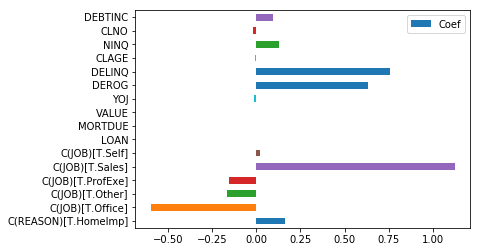

In [10]:
ds_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
ds_logistic_coef.plot.barh(y="Coef")

In [11]:
ds_hmeq_char = ds_hmeq.select_dtypes(include="object")
ds_hmeq_numeric = ds_hmeq.select_dtypes(exclude = "object")

ds_hmeq_char_train = ds_hmeq_char[msk]
ds_hmeq_numeric_scaled_train = scale(ds_hmeq_numeric[msk])
ds_hmeq_numeric_scaled_train = pd.DataFrame(ds_hmeq_numeric_scaled_train, columns=ds_hmeq_numeric.columns)
ds_hmeq_numeric_scaled_train.head()

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,3.124153,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555
1,3.124153,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145
2,-0.320087,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747
3,-0.320087,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711
4,-0.320087,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514


In [12]:
ds_hmeq_numeric_scaled_train["BAD"] = np.where(ds_hmeq_numeric_scaled_train["BAD"]>0,1,0)
ds_hmeq_numeric_scaled_train.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555
1,1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145
2,0,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747
3,0,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711
4,0,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514


In [13]:
ds_hmeq_scaled_train = pd.concat([ds_hmeq_numeric_scaled_train, ds_hmeq_char_train.reset_index(drop= True)], axis=1)

Optimization terminated successfully.
         Current function value: 0.244454
         Iterations 7


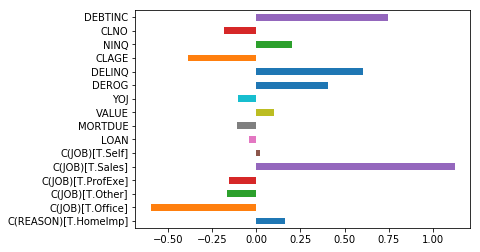

In [14]:
scaled_log_model = sm.Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB)+YOJ +
DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC +1""", ds_hmeq_scaled_train)

scaled_log_result = scaled_log_model.fit()

ds_logg_scaled_coef = pd.DataFrame({'Coef': scaled_log_result.params.values[1:]},
                                  index = scaled_log_model.exog_names[1:])
ds_logg_scaled_coef.plot.barh(y="Coef", legend = False)

## 실습 

In [15]:
ds_tc = pd.read_csv("실습파일/통신고객이탈.csv")
ds_tc.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [16]:
ds_tc.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [17]:
np.random.seed(1234)
msk = np.random.rand(ds_tc.shape[0],) < 0.7
ds_tc["CHURN"].replace(to_replace = "Active", value = 0, inplace = True)
ds_tc["CHURN"].replace(to_replace = "Churned", value = 1, inplace = True)

ds_tc_train = ds_tc[msk]
ds_tc_test = ds_tc[~msk]

print("train data size:{}".format(ds_tc_train.shape))
print("test data size:{}".format(ds_tc_test.shape))

train data size:(635, 15)
test data size:(295, 15)


In [18]:
ds_tc_train = sm.add_constant(ds_tc_train)
ds_tc_train.head()

,const,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1.0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1.0,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1.0,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
5,1.0,0,K105530,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1.0,0,K106210,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2


In [19]:
log_model_tc = sm.Logit.from_formula(""" CHURN ~ C(GENDER)+ AGE + C(CHARGE_TYPE) 
+ C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME 
+ WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME + 1 """, ds_tc_train)

log_result_tc = log_model_tc.fit(method='bfgs')
print(log_result_tc.summary())

         Current function value: 0.261293
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  635
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                           29
Date:                Mon, 11 Feb 2019   Pseudo R-squ.:                  0.4660
Time:                        09:18:41   Log-Likelihood:                -165.92
converged:                      False   LL-Null:                       -310.70
                                        LLR p-value:                 9.369e-45
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.1342      2

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [20]:
y_pred_tc = log_result_tc.predict(ds_tc_test)
y_pred_class_tc = (y_pred_tc > .5).astype(int)
y_pred_class_tc.head()

3    0
4    0
7    0
8    0
9    0
dtype: int64

In [21]:
print("Accuracy: {0:.3f}".format(metrics.accuracy_score(ds_tc_test["CHURN"], y_pred_class_tc)))

Accuracy: 0.898


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [23]:
ds_hmeq = pd.read_csv("실습파일/HMEQ.csv")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [24]:
ds_hmeq.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [25]:
ds_hmeq["JOB"].fillna("Other", inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace = True)

In [26]:
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [27]:
np.random.seed(seed=1234)

msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train =ds_hmeq_dummy[msk]
ds_hmeq_test =ds_hmeq_dummy[~msk]

ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1, inplace = False)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1, inplace = False)
 
print("train data X size:{}".format(ds_hmeq_train_x.shape))
print("train data Y size:{}".format(ds_hmeq_train_y.shape))
print("test data X size:{}".format(ds_hmeq_test_x.shape))
print("test data Y size:{}".format(ds_hmeq_test_y.shape))

train data X size:(2604, 18)
train data Y size:(2604,)
test data X size:(1144, 18)
test data Y size:(1144,)


In [28]:
from sklearn.model_selection import train_test_split

ds_hmeq_y = ds_hmeq_dummy["BAD"]
ds_hmeq_x = ds_hmeq_dummy.drop("BAD", axis = 1, inplace = False)

ds_hmeq_train_x2, ds_hmeq_test_x2, ds_hmeq_train_y2, ds_hmeq_test_y2 =\
train_test_split(ds_hmeq_x, ds_hmeq_y, test_size=0.30, random_state = 1234)

print("train data X size:{}".format(ds_hmeq_train_x2.shape))
print("train data Y size:{}".format(ds_hmeq_train_y2.shape))
print("test data X size:{}".format(ds_hmeq_test_x2.shape))
print("test data Y size:{}".format(ds_hmeq_test_y2.shape))

train data X size:(2623, 18)
train data Y size:(2623,)
test data X size:(1125, 18)
test data Y size:(1125,)


In [29]:
tree_uncustomized = DecisionTreeClassifier(random_state =1234)
tree_uncustomized.fit(ds_hmeq_train_x,ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.927


In [30]:
tree_uncustomized.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')>

In [31]:
train_accuracy = []
test_accuracy  = []

para_criterion = ["gini", "entropy"]

for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion= criterion, random_state=1234)
    tree1.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    train_accuracy.append(tree1.score(ds_hmeq_train_x, ds_hmeq_train_y))
    test_accuracy.append(tree1.score(ds_hmeq_test_x, ds_hmeq_test_y))
    
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.927
1,entropy,1.0,0.921


In [32]:
train_accuracy =[]; test_accuracy= []
para_criterion =[]; para_max_depth=[]

n_iter_depth = 10

list_criterion = ["gini","entropy"]

for criterion in list_criterion:
    for depth in range(1, n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion= criterion, max_depth= depth, random_state=1234)
        tree2.fit(ds_hmeq_train_x, ds_hmeq_train_y)

        train_accuracy.append(tree2.score(ds_hmeq_train_x, ds_hmeq_train_y))
        test_accuracy.append(tree2.score(ds_hmeq_test_x, ds_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [33]:
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.924,0.927
1,gini,2,0.930,0.932
2,gini,3,0.931,0.932
3,gini,4,0.934,0.934
4,gini,5,0.937,0.934
5,gini,6,0.938,0.937
6,gini,7,0.944,0.934
7,gini,8,0.952,0.935
8,gini,9,0.959,0.936
9,gini,10,0.965,0.943


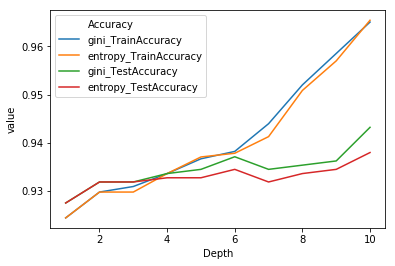

In [34]:
ds_accuracy2_melt = pd.melt(ds_accuracy2, id_vars=["Criterion", "Depth"])
ds_accuracy2_melt["Accuracy"] = ds_accuracy2_melt["Criterion"] + "_" + ds_accuracy2_melt["variable"]
sns.lineplot(x="Depth", y="value", hue="Accuracy", data=ds_accuracy2_melt)

In [35]:
train_accuracy =[]; test_accuracy= []
para_criterion =[]; para_max_depth=[]; para_min_leaf_size =[]

max_depth = 10

list_min_leaf_size = [i*10 for i in range(1, 6)]

for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion= criterion, max_depth= max_depth,
                                       min_samples_leaf = leafsize, random_state=1234)
        tree3.fit(ds_hmeq_train_x, ds_hmeq_train_y)
        train_accuracy.append(tree3.score(ds_hmeq_train_x, ds_hmeq_train_y))
        test_accuracy.append(tree3.score(ds_hmeq_test_x, ds_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)
        para_min_leaf_size.append(leafsize)

In [36]:
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.945,0.935
1,gini,10,20,0.931,0.924
2,gini,10,30,0.929,0.929
3,gini,10,40,0.926,0.924
4,gini,10,50,0.924,0.930
5,entropy,10,10,0.944,0.930
6,entropy,10,20,0.930,0.925
7,entropy,10,30,0.927,0.933
8,entropy,10,40,0.924,0.927
9,entropy,10,50,0.924,0.930


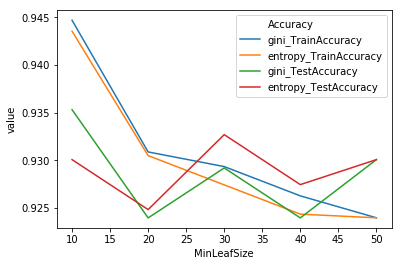

In [37]:
ds_accuracy3_melt = pd.melt(ds_accuracy3, id_vars=["Criterion", "Depth", "MinLeafSize"])

ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"] + "_" + ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=ds_accuracy3_melt)

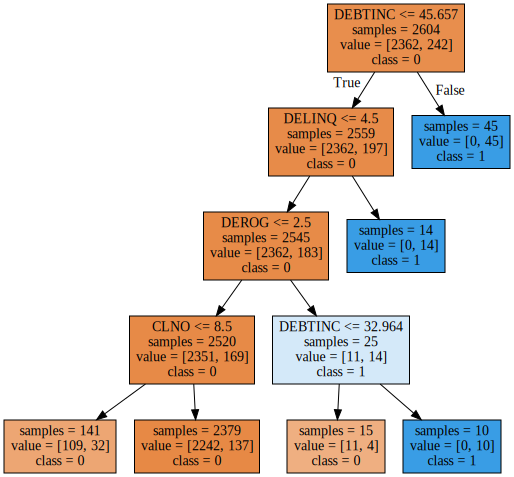

In [38]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1234)

tree.fit(ds_hmeq_train_x, ds_hmeq_train_y)

export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
               feature_names = ds_hmeq_train_x.columns, impurity = False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

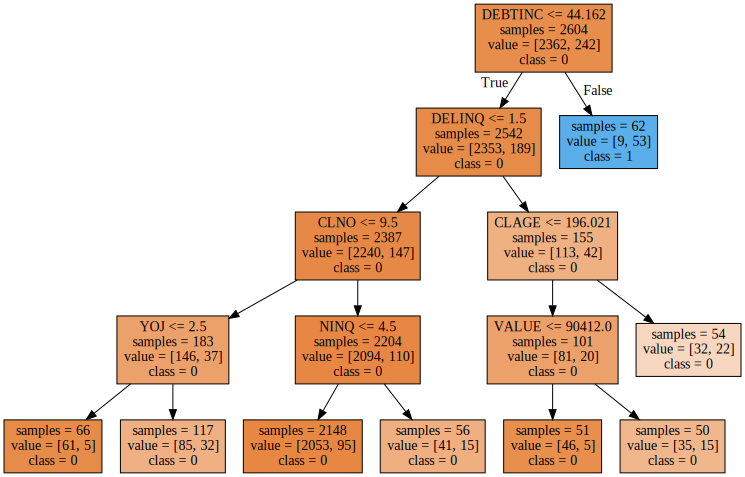

In [39]:
tree4 = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=50, random_state=1234)
tree5 = tree4.fit(ds_hmeq_train_x, ds_hmeq_train_y)

export_graphviz(tree5, out_file="tree2.dot", class_names=["0", "1"],
               feature_names = ds_hmeq_train_x.columns, impurity = False, filled=True)

with open("tree2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

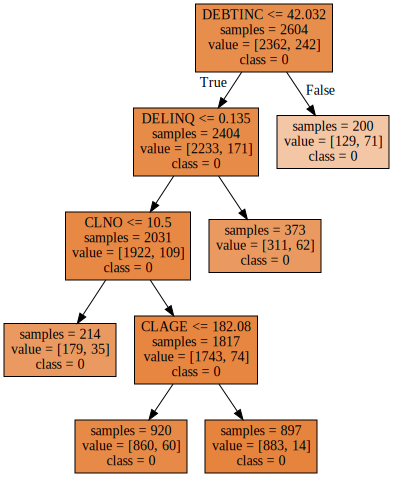

In [40]:
tree4 = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=200, random_state=1234)
tree5 = tree4.fit(ds_hmeq_train_x, ds_hmeq_train_y)

export_graphviz(tree5, out_file="tree3.dot", class_names=["0", "1"],
               feature_names = ds_hmeq_train_x.columns, impurity = False, filled=True)

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [41]:
ds_feature_importance = pd.DataFrame()
ds_feature_importance['Feature'] = ds_hmeq_train_x.columns
ds_feature_importance['Importance'] = tree.feature_importances_

ds_feature_importance.sort_values("Importance", ascending =False)
ds_feature_importance.round(3)

,Feature,Importance
0,LOAN,0.000
1,MORTDUE,0.000
2,VALUE,0.000
3,YOJ,0.000
4,DEROG,0.096
5,DELINQ,0.191
6,CLAGE,0.000
7,NINQ,0.000
8,CLNO,0.061
9,DEBTINC,0.652


In [42]:
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt
for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname: plt.rcParams['font.family']='NanumBarunGothic'
    # 폰트 나눔고딕으로

print(plt.rcParams['font.family'])

matplotlib.rcParams['axes.unicode_minus'] = False # '-'기호 제대로 나오게

['NanumBarunGothic']


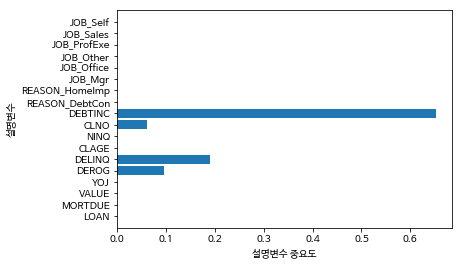

In [43]:
def plot_feature_importances(model):
    n_features = ds_hmeq_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), ds_hmeq_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
    
plot_feature_importances(tree)

## 실습

In [44]:
ds_tc = pd.read_csv("실습파일/통신고객이탈.csv")
ds_tc.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [45]:
ds_tc["CHURN"].replace(to_replace = "Active", value = 0, inplace = True)
ds_tc["CHURN"].replace(to_replace = "Churned", value = 1, inplace = True)

In [46]:
ds_tc.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [47]:
ds_tc_dummy = pd.get_dummies(ds_tc)
ds_tc_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
np.random.seed(seed=1234)

msk = np.random.rand(ds_tc_dummy.shape[0]) < 0.7
ds_tc_train =ds_tc_dummy[msk]
ds_tc_test =ds_tc_dummy[~msk]

ds_tc_train_y = ds_tc_train["CHURN"]
ds_tc_train_x = ds_tc_train.drop("CHURN", axis = 1, inplace = False)
ds_tc_test_y = ds_tc_test["CHURN"]
ds_tc_test_x = ds_tc_test.drop("CHURN", axis = 1, inplace = False)

print("train data X size:{}".format(ds_tc_train_x.shape))
print("train data Y size:{}".format(ds_tc_train_y.shape))
print("test data X size:{}".format(ds_tc_test_x.shape))
print("test data Y size:{}".format(ds_tc_test_y.shape))

train data X size:(635, 963)
train data Y size:(635,)
test data X size:(295, 963)
test data Y size:(295,)


In [49]:
train_accuracy =[]; test_accuracy= []
para_criterion =[]; para_max_depth=[]; para_min_leaf_size =[]

max_depth = 10

list_min_leaf_size = [i*3 for i in range(1, 10,2)]

for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion= criterion, max_depth= max_depth,
                                       min_samples_leaf = leafsize, random_state=1234)
        tree3.fit(ds_tc_train_x, ds_tc_train_y)
        train_accuracy.append(tree3.score(ds_tc_train_x, ds_tc_train_y))
        test_accuracy.append(tree3.score(ds_tc_test_x, ds_tc_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)
        para_min_leaf_size.append(leafsize)

In [50]:
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,3,0.961,0.847
1,gini,10,9,0.920,0.885
2,gini,10,15,0.906,0.902
3,gini,10,21,0.896,0.864
4,gini,10,27,0.868,0.817
5,entropy,10,3,0.951,0.837
6,entropy,10,9,0.920,0.902
7,entropy,10,15,0.906,0.902
8,entropy,10,21,0.885,0.824
9,entropy,10,27,0.868,0.817


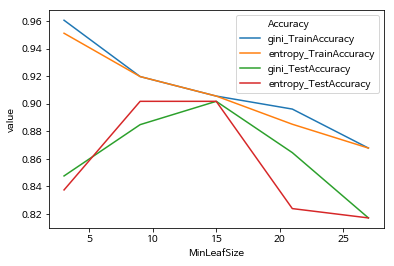

In [51]:
ds_accuracy3_melt = pd.melt(ds_accuracy3, id_vars=["Criterion", "Depth", "MinLeafSize"])

ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"] + "_" + ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=ds_accuracy3_melt)

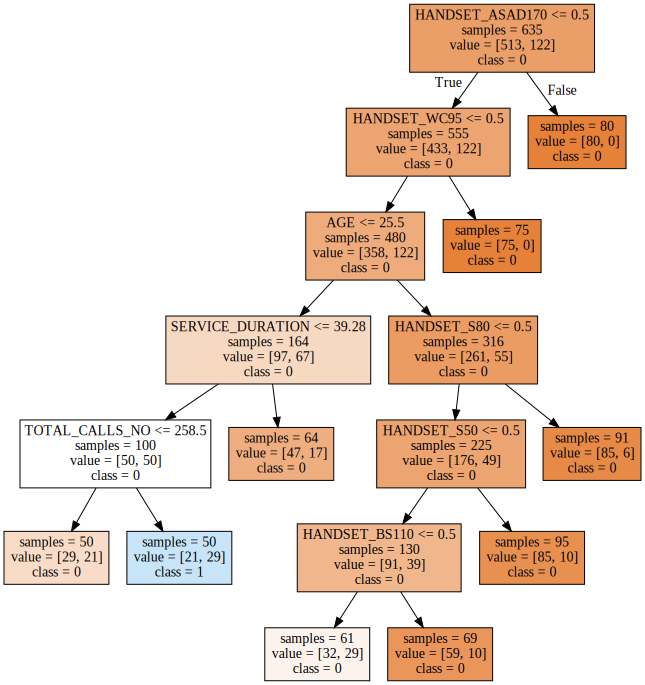

In [52]:
tree4 = DecisionTreeClassifier(criterion="entropy", max_depth=15, min_samples_leaf=50, random_state=1234)
tree5 = tree4.fit(ds_tc_train_x, ds_tc_train_y)

export_graphviz(tree5, out_file="tree3.dot", class_names=["0", "1"],
               feature_names = ds_tc_train_x.columns, impurity = False, filled=True)

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))